In [3]:
import numpy as np
import pandas as pd

## Некоторые из библиотек будем импортировать по ходу выполнения задания, в зависимости от применяемого подхода

In [4]:
df = pd.read_csv('.../train_spam.csv')
df

,text_type,text
0,ham,make sure alex knows his birthday is over in f...
1,ham,a resume for john lavorato thanks vince i will...
2,spam,plzz visit my website moviesgodml to get all m...
3,spam,urgent your mobile number has been awarded wit...
4,ham,overview of hr associates analyst project per ...
...,...,...
16273,spam,if you are interested in binary options tradin...
16274,spam,dirty pictureblyk on aircel thanks you for bei...
16275,ham,or you could do this g on mon 1635465 sep 1635...
16276,ham,insta reels par 80 गंद bhara pada hai 👀 kuch b...


## Взлянем на длины текстов

In [218]:
df['len'] = df['text'].apply(lambda x: len(x))
df

,text_type,text,len
0,0,make sure alex knows his birthday is over in f...,86
1,0,a resume for john lavorato thanks vince i will...,520
2,1,plzz visit my website moviesgodml to get all m...,126
3,1,urgent your mobile number has been awarded wit...,139
4,0,overview of hr associates analyst project per ...,733
...,...,...,...
16273,1,if you are interested in binary options tradin...,114
16274,1,dirty pictureblyk on aircel thanks you for bei...,454
16275,0,or you could do this g on mon 1635465 sep 1635...,799
16276,0,insta reels par 80 गंद bhara pada hai 👀 kuch b...,102


<Axes: >

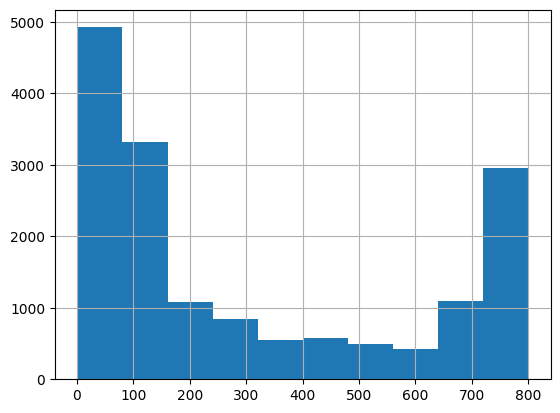

In [219]:
df['len'].hist()

In [7]:
df['text'][0]

'make sure alex knows his birthday is over in fifteen minutes as far as youre concerned'

In [8]:
df['text_type'][0]

'ham'

In [220]:
y.value_counts()

text_type
0    11469
1     4809
Name: count, dtype: int64

## Можно заметить, что присутсвует дисбаланс классов
## Учтем это при разбиении выборки.

In [36]:
# Загрузка тренировочного датасета
train_data = pd.read_csv(".../train_spam.csv")

# Разделение на текст и флаг СПАМа
X = train_data['text']
y = train_data['text_type']


In [38]:
# Разделение набора на 70% для обучения и 30% для валидации
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

from sklearn.feature_extraction.text import TfidfVectorizer

Данные тексты необходимо преобразовать в числовые признаки для использования в алгоритмах машинного обучения. 
Векторизаторы преобразуют текстовые данные в числовые векторы признаков. 
Класс TfidfVectorizer реализует конкретно векторное представление текста по частоте термина - обратной частоте документа (TF-IDF). 
TF-IDF учитывает как важность слова внутри документа (частота термина), так и его общую важность во всей коллекции документов.

from sklearn.naive_bayes import MultinomialNB

Класс MultinomialNB реализует алгоритм мультиномиального наивного Байеса, популярный алгоритм классификации для текстовых данных.

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords

Стоп-слова - это общие слова, такие как "the", "a", "an", которые не несут много смысловой информации и могут быть удалены при обработке текста. Удаление стоп-слов может улучшить производительность модели машинного обучения, поскольку она сосредотачивается на более значимых словах.

from nltk.stem import SnowballStemmer

Стемминг - это процесс приведения слов к их корневой форме. Например, слова "running", "runner", "ran" будут преобразованы в основную форму "run". Стемминг может помочь улучшить производительность модели машинного обучения, поскольку она уменьшает количество вариаций слов, которые необходимо учитывать.

In [29]:
# Очистка текста от punctuation, stop words, etc.
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from tqdm.notebook import tqdm

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub('[^\w\s]', '', text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = [word for word in text.split() if word not in stop_words]

    # Stemming
    stemmer = SnowballStemmer('english')
    text = [stemmer.stem(word) for word in text]

    # Join words back into string
    text = ' '.join(text)
    return text

# Применение очистки к тренировочному и валидационному наборам
X_train_clean = tqdm([clean_text(text) for text in X_train])
X_val_clean = tqdm([clean_text(text) for text in X_val])


  0%|          | 0/11394 [00:00<?, ?it/s]

  0%|          | 0/4884 [00:00<?, ?it/s]

In [30]:
# Векторизация текста с помощью TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_clean)
X_val_tfidf = vectorizer.transform(X_val_clean)

In [31]:
# Обучение модели Multinomial Naive Bayes
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [32]:
# Прогнозирование на валидационном наборе
y_val_pred = nb_clf.predict_proba(X_val_tfidf)[:, 1] # Probability of SPAM

# ROC-AUC score на валидационном наборе
roc_auc = roc_auc_score(y_val, y_val_pred)
print("ROC-AUC score on validation set:", roc_auc)

ROC-AUC score on validation set: 0.9452705045729384


In [48]:
pd.Series(np.where(y_val_pred >= 0.5, 1, 0)).value_counts()

0    4019
1     865
Name: count, dtype: int64

In [35]:
# Очистка тестового текста
X_test = pd.read_csv(".../test_spam.csv")['text']
X_test_clean = [clean_text(text) for text in X_test]

# Векторизация тестового текста
X_test_tfidf = vectorizer.transform(X_test_clean)

# Прогнозирование на тестовом наборе
y_test_pred = nb_clf.predict_proba(X_test_tfidf)[:, 1] # Probability of SPAM

# Создание таблицы с прогнозами
predictions = pd.DataFrame({'text': X_test, 'score': y_test_pred})

# Сохранение в CSV-файл
predictions.to_csv("spam_predictions_MultinomialNB.csv", index=False)


## Теперь попробуем решить задачу с помощью PuzzleCNN

In [192]:
train_data = pd.read_csv(".../train_spam.csv")
train_data

,text_type,text
0,ham,make sure alex knows his birthday is over in f...
1,ham,a resume for john lavorato thanks vince i will...
2,spam,plzz visit my website moviesgodml to get all m...
3,spam,urgent your mobile number has been awarded wit...
4,ham,overview of hr associates analyst project per ...
...,...,...
16273,spam,if you are interested in binary options tradin...
16274,spam,dirty pictureblyk on aircel thanks you for bei...
16275,ham,or you could do this g on mon 1635465 sep 1635...
16276,ham,insta reels par 80 गंद bhara pada hai 👀 kuch b...


In [193]:
# Преобразуем все к нижнему регистру
train_data['text'] = train_data['text'].str.lower()
train_data['text'] = train_data['text'].str.lower().apply(lambda x: ''.join(i for i in x if i.isalnum()))

Нам нужно закодировать последовательность перед тем, как подавать её в нейронную сеть — для этого реализуем нужные функции. Чтобы закодировать один элемент последовательности, нужно составить словари символов:

In [194]:
letters = set(''.join(train_data.text))
n_letters = len(letters)

In [217]:
letter_index_map = dict(zip(letters, range(n_letters)))

In [196]:
len(letter_index_map)

1477

## Добавим фичу, обозначающую длину текущего текста

In [197]:
train_data['lengths'] = train_data['text'].apply(lambda x: len(x))
train_data

,text_type,text,lengths
0,ham,makesurealexknowshisbirthdayisoverinfifteenmin...,71
1,ham,aresumeforjohnlavoratothanksvinceiwillgetmovin...,424
2,spam,plzzvisitmywebsitemoviesgodmltogetallmoviesfor...,100
3,spam,urgentyourmobilenumberhasbeenawardedwitha2000p...,116
4,ham,overviewofhrassociatesanalystprojectperdavidsr...,607
...,...,...,...
16273,spam,ifyouareinterestedinbinaryoptionstradingsoimay...,96
16274,spam,dirtypictureblykonaircelthanksyouforbeingavalu...,381
16275,ham,oryoucoulddothisgonmon1635465sep1635465davidre...,653
16276,ham,instareelspar80गदbharapadahaikuchbhidaltenotcr...,79


In [198]:
train_data['lengths'].min(), train_data['lengths'].max()

(0, 791)

## В данной реализации необходимо, чтобы все входные последовательности были одинаковых длин.

In [199]:
def pad_texts(df, col_name, max_len, fill_char='0'):
    """
    Заполняет строки в Pandas Dataframe символом '#' до максимальной длины.
  
    Args:
      df: Pandas Dataframe.
      col_name: Название колонки, содержащей текст.
      max_len: Максимальная длина строк.
      fill_char: Символ для заполнения (по умолчанию '#').

    Returns:
      Pandas Dataframe с заполненными строками.
    """

    df[col_name] = df[col_name].apply(lambda x: x.ljust(max_len, fill_char))
    return df

padded_train_data = pad_texts(train_data.copy(), 'text', train_data['lengths'].max())
padded_train_data

,text_type,text,lengths
0,ham,makesurealexknowshisbirthdayisoverinfifteenmin...,71
1,ham,aresumeforjohnlavoratothanksvinceiwillgetmovin...,424
2,spam,plzzvisitmywebsitemoviesgodmltogetallmoviesfor...,100
3,spam,urgentyourmobilenumberhasbeenawardedwitha2000p...,116
4,ham,overviewofhrassociatesanalystprojectperdavidsr...,607
...,...,...,...
16273,spam,ifyouareinterestedinbinaryoptionstradingsoimay...,96
16274,spam,dirtypictureblykonaircelthanksyouforbeingavalu...,381
16275,ham,oryoucoulddothisgonmon1635465sep1635465davidre...,653
16276,ham,instareelspar80गदbharapadahaikuchbhidaltenotcr...,79


In [200]:
padded_train_data['lengths'] = padded_train_data['text'].apply(lambda x: len(x))
padded_train_data['lengths'].min(), padded_train_data['lengths'].max()

(791, 791)

In [202]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [203]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

from collections import Counter
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from torch import nn
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm

In [152]:
def plot_progress(train_losses, train_accs, val_loss, val_accs):
    clear_output(True)

    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    f.set_figheight(6)
    f.set_figwidth(12)

    ax1.plot(train_losses, label='train loss')
    ax1.plot(val_loss, label='test loss')
    ax1.plot(np.zeros_like(train_losses), '--', label='zero')
    ax1.set_title('Loss', fontsize=14)
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Batch number')
    ax1.legend()

    ax2.plot(train_accs, label='train accuracy')
    ax2.plot(val_accs, label='val accuracy')
    ax2.plot(np.ones_like(accs), '--', label='100% accuracy')
    ax2.set_title('Accuracy', fontsize=14)
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Batch number')
    ax2.legend()

    plt.show()

## Реализуем PyTorch Dataset — класс, переводящий одну строчку символов в последовательность индексов.

In [153]:
class SequenceDataset(Dataset):

    def __init__(self, lines, labels):
        self.lines = lines
        self.labels = labels

    def __len__(self):
        return len(self.lines)

    def __getitem__(self, idx):
        x = self.line_to_tensor(self.lines[idx]).long()
        y = torch.tensor(self.labels[idx]).float()
        return x, y

    @staticmethod
    def line_to_tensor(line):
        return torch.tensor([letter_index_map[l] for l in line])

In [204]:

# Замена значений
padded_train_data['text_type'].replace({'ham': 0, 'spam': 1}, inplace=True)

# Проверка результата
padded_train_data['text_type'].value_counts()

/tmp/ipykernel_33/3569364918.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  padded_train_data['text_type'].replace({'ham': 0, 'spam': 1}, inplace=True)
/tmp/ipykernel_33/3569364918.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  padded_train_data['text_type'].replace({'ham': 0, 'spam': 1}, 

text_type
0    11469
1     4809
Name: count, dtype: int64

## Разбиваем данные на обучающую и валидационную выборку, создаём соответствующие объекты DataLoader.

In [205]:
X_train, X_val, y_train, y_val = train_test_split(
    padded_train_data['text'],
    padded_train_data['text_type'],
    test_size=0.05,
)

train_dataset = SequenceDataset(lines=X_train.values, labels=y_train.values)
val_dataset = SequenceDataset(lines=X_val.values, labels=y_val.values)

In [206]:
train_sequence_dataloader = DataLoader(train_dataset, batch_size=512, shuffle=True)
val_sequence_dataloader = DataLoader(val_dataset, batch_size=512, shuffle=True)

## Архитектура сети

In [157]:
class PuzzleCNN(nn.Module):

    def __init__(self, vocab_size, hidden_size, kernel_size=5, embedding_dim=8):
        super(PuzzleCNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.cnn = nn.Conv1d(embedding_dim, hidden_size, kernel_size=kernel_size, groups=2)
        self.relu = nn.ReLU()
        self.linear = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(0, 2, 1)
        x = self.cnn(x)
        x, _ = x.max(dim=-1)
        x = self.relu(x)
        x = self.linear(x)
        x = self.sigmoid(x).squeeze()
        return x

In [113]:
def plot_progress_for_auc(train_losses, train_accs, val_loss, val_accs):
    clear_output(True)

    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    f.set_figheight(6)
    f.set_figwidth(12)

    ax1.plot(train_losses, label='train loss')
    ax1.plot(val_loss, label='test loss')
    ax1.plot(np.zeros_like(train_losses), '--', label='zero')
    ax1.set_title('Loss', fontsize=14)
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Batch number')
    ax1.legend()

    ax2.plot(train_accs, label='train roc_auc')
    ax2.plot(val_accs, label='val roc_auc')
    ax2.plot(np.ones_like(accs), '--', label='100% roc_auc')
    ax2.set_title('ROC-AUC', fontsize=14)
    ax2.set_ylabel('ROC-AUC')
    ax2.set_xlabel('Batch number')
    ax2.legend()

    plt.show()

## Цикл обучения

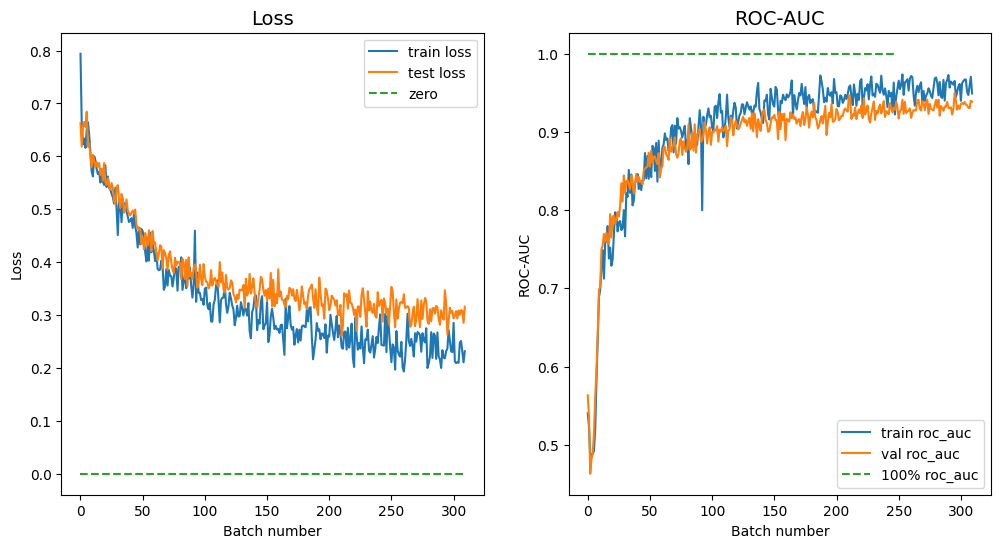

In [158]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import roc_auc_score

# Инициализируем класс модели, размер внутреннего слоя 16, ширина окна 12
model = PuzzleCNN(
    vocab_size=len(letter_index_map),
    hidden_size=16,
    kernel_size=12)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Лосс функция – бинарная кросс энтропия
loss_func = nn.BCELoss()

n_epochs = 10

# Списки для сохранения истории функции ошибки и AUC
losses = []
aucs = []

val_losses = []
val_aucs = []


for i in range(n_epochs):
    for x_train, y_train in train_sequence_dataloader:
        model.train()
        preds = model(x_train)
        train_loss = loss_func(preds, y_train)
        
        # Рассчитываем AUC на обучающем наборе
        train_auc = roc_auc_score(y_train.cpu(), preds.detach().cpu())
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        model.eval()
        # Не рассчитавать градиент по валидационной выборкке
        x_val, y_val = next(iter(val_sequence_dataloader))
        # генерируем один батч для валидации
        val_preds = model(x_val)
        val_loss = loss_func(val_preds, y_val)
        # Рассчитываем AUC на валидационном наборе
        val_auc = roc_auc_score(y_val.cpu(), val_preds.detach().cpu())
        losses.append(train_loss.item())
        aucs.append(train_auc.item())
        val_losses.append(val_loss.item())
        val_aucs.append(val_auc.item())
        plot_progress_for_auc(losses, aucs, val_losses, val_aucs)


In [166]:
X_test = pd.read_csv(".../test_spam.csv")
X_test

,text
0,j jim whitehead ejw cse ucsc edu writes j you ...
1,original message from bitbitch magnesium net p...
2,java for managers vince durasoft who just taug...
3,there is a youtuber name saiman says
4,underpriced issue with high return on equity t...
...,...
4065,husband to wifetum meri zindagi hoorwifeor kya...
4066,baylor enron case study cindy yes i shall co a...
4067,boring as compared to tp
4068,hellogorgeous hows u my fone was on charge lst...


In [168]:
letters = set(''.join(X_test.text))
n_letters = len(letters)

In [213]:
letter_index_map = dict(zip(letters, range(n_letters)))

## Выполняем схожую предобработку для тестовых данных

In [171]:
X_test['text'] = X_test['text'].str.lower().apply(lambda x: ''.join(i for i in x if i.isalnum()))
X_test['lengths'] = X_test['text'].apply(lambda x: len(x))
X_test

,text,lengths
0,jjimwhiteheadejwcseucsceduwritesjyouopensource...,567
1,originalmessagefrombitbitchmagnesiumnetpeoplea...,479
2,javaformanagersvincedurasoftwhojusttaughttheja...,560
3,thereisayoutubernamesaimansays,30
4,underpricedissuewithhighreturnonequitytheoilan...,618
...,...,...
4065,husbandtowifetummerizindagihoorwifeorkyatellme...,105
4066,baylorenroncasestudycindyyesishallcoauthorthis...,319
4067,boringascomparedtotp,20
4068,hellogorgeoushowsumyfonewasonchargelstnitwwenu...,107


In [172]:
def pad_texts(df, col_name, max_len, fill_char='0'):

    df[col_name] = df[col_name].apply(lambda x: x.ljust(max_len, fill_char))
    return df


padded_test_data = pad_texts(X_test.copy(), 'text', X_test['lengths'].max())
padded_test_data

,text,lengths
0,jjimwhiteheadejwcseucsceduwritesjyouopensource...,567
1,originalmessagefrombitbitchmagnesiumnetpeoplea...,479
2,javaformanagersvincedurasoftwhojusttaughttheja...,560
3,thereisayoutubernamesaimansays0000000000000000...,30
4,underpricedissuewithhighreturnonequitytheoilan...,618
...,...,...
4065,husbandtowifetummerizindagihoorwifeorkyatellme...,105
4066,baylorenroncasestudycindyyesishallcoauthorthis...,319
4067,boringascomparedtotp00000000000000000000000000...,20
4068,hellogorgeoushowsumyfonewasonchargelstnitwwenu...,107


In [173]:
padded_test_data['lengths'] = padded_test_data['text'].apply(lambda x: len(x))
padded_test_data['lengths'].min(), padded_test_data['lengths'].max()

(691, 691)

In [ ]:
padded_test_data['lengths'].min(), padded_test_data['lengths'].max()

## Немного изменяем класс SequenceDataset для тестовых данных

In [174]:
class TestSequenceDataset(Dataset):

    def __init__(self, lines):
        self.lines = lines

    def __len__(self):
        return len(self.lines)

    def __getitem__(self, idx):
        x = self.line_to_tensor(self.lines[idx]).long()
        return x

    @staticmethod
    def line_to_tensor(line):
        return torch.tensor([letter_index_map[l] for l in line]).long()


In [177]:
test_dataset = TestSequenceDataset(lines=padded_test_data['text'].values)
test_sequence_dataloader = DataLoader(test_dataset, batch_size=512, shuffle=False)

## Делаем предсказания

In [187]:
model.eval()
preds_list = []

with torch.no_grad():
    for x in test_sequence_dataloader:
        preds = 1 - model(x)
        preds_list.append(preds.detach().cpu())


In [188]:
all_preds = torch.cat(preds_list, dim=0)
all_preds

tensor([0.0024, 0.0343, 0.0032,  ..., 0.0021, 0.0360, 0.1970])

# Небольшое сравнение с предыдущим методом

In [189]:
pd.Series(np.where(all_preds >= 0.5, 1, 0)).value_counts()

0    3827
1     243
Name: count, dtype: int64

In [190]:
pd.Series(np.where(y_test_pred >= 0.5, 1, 0)).value_counts()

0    3326
1     744
Name: count, dtype: int64

In [214]:
predictions

,text,score
0,j jim whitehead ejw cse ucsc edu writes j you ...,0.002724
1,original message from bitbitch magnesium net p...,0.002562
2,java for managers vince durasoft who just taug...,0.000661
3,there is a youtuber name saiman says,0.174142
4,underpriced issue with high return on equity t...,0.219197
...,...,...
4065,husband to wifetum meri zindagi hoorwifeor kya...,0.290118
4066,baylor enron case study cindy yes i shall co a...,0.000012
4067,boring as compared to tp,0.165087
4068,hellogorgeous hows u my fone was on charge lst...,0.034272


In [215]:
cnn_predictions

,text,score
0,jjimwhiteheadejwcseucsceduwritesjyouopensource...,0.002356
1,originalmessagefrombitbitchmagnesiumnetpeoplea...,0.034338
2,javaformanagersvincedurasoftwhojusttaughttheja...,0.003205
3,thereisayoutubernamesaimansays0000000000000000...,0.877430
4,underpricedissuewithhighreturnonequitytheoilan...,0.008168
...,...,...
4065,husbandtowifetummerizindagihoorwifeorkyatellme...,0.380626
4066,baylorenroncasestudycindyyesishallcoauthorthis...,0.040324
4067,boringascomparedtotp00000000000000000000000000...,0.002105
4068,hellogorgeoushowsumyfonewasonchargelstnitwwenu...,0.035962


## Итог:
## Первый способ показал немного лучшее качество, а также оказался значительно быстрее.
## Скорее всего нашу модель нужно будет периодически переобучать на новых данных, а значит у первого метода явное преимущество.

In [191]:
# Создание таблицы с прогнозами
cnn_predictions = pd.DataFrame({'text': padded_test_data['text'], 'score': all_preds})

# Сохранение в CSV-файл
cnn_predictions.to_csv("spam_predictions_PuzzleCNN.csv", index=False)


## В связи с ограниченными вычислительными ресурсами не смогли рассмотреть более сложные подходы к решению задачи, такие как трансформеры и другие подобные методы.